In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("day.csv").drop(['instant', 
                                                          'dteday', 
                                                          'season', 
                                                          'yr', 
                                                          'mnth', 
                                                          'holiday', 
                                                          'weekday', 
                                                          'weathersit', 
                                                          'workingday'], axis = 1)

In [3]:
data

,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,0.363478,0.353739,0.696087,0.248539,131,670,801
2,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...
726,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,0.255833,0.231700,0.483333,0.350754,364,1432,1796


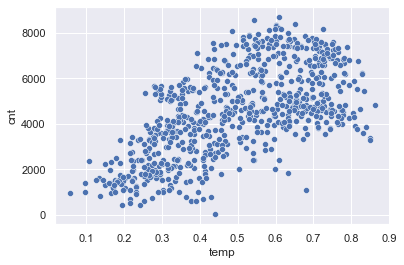

In [4]:
sns.set()

sns.scatterplot(data = data, x = 'temp', y = 'cnt');

In [5]:
inputs = data[['casual', 'registered']]
target = data['cnt']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, 
                                                    test_size=0.2, 
                                                    random_state=365)

In [7]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [8]:
reg_knn = KNeighborsRegressor(n_neighbors = 2)
reg_knn.fit(x_train_scaled, y_train)
y_test_pred_knn = reg_knn.predict(x_test_scaled)

In [9]:
reg_lin = LinearRegression()
reg_lin.fit(x_train_scaled, y_train)
y_test_pred_lin = reg_lin.predict(x_test_scaled)

In [10]:
x = [50, 8000]
y = [50, 8000]

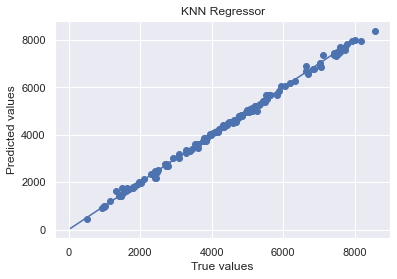

In [11]:
sns.set()

plt.scatter(y_test, y_test_pred_knn)
plt.plot(x, y)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('KNN Regressor');

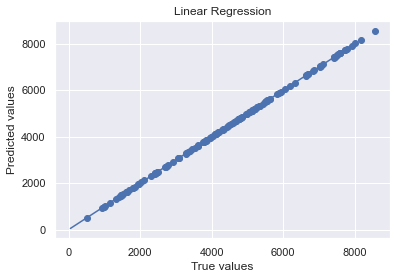

In [12]:
sns.set()

plt.scatter(y_test, y_test_pred_lin)
plt.plot(x, y);
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Linear Regression');

In [13]:
reg_knn.score(x_test_scaled, y_test), reg_lin.score(x_test_scaled, y_test)

(0.9979433147107003, 1.0)